# Explicación básica de regresión lineal

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Diciembre de 2024  
**Versión:** 1.0  

---

## Descripción

Este notebook ofrece un ejemplo de predicción de una variable continua. Se construye un modelo predictivo usando 2 algoritmos: LinearRegression y DecisionTreeRegressor (como complemento).

Se va a predecir el sueldo de una persona considerando su edad, es decir, una variable depediente y una variable independiente.

Se usan datos generados aleatoriamente y con una relación "forzada" entre las variables.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (>=1.1.0)
- numpy (1.26.4)
- matplotlib (3.7.1)
- seaborn (0.13.1)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

## Creación del modelo

En todo modelo de predicción se tiene una variable predicha (variable dependiente) y una o más variables predictoras (variables independientes).
                    
En el caso de que se tenga solo una variable predictora se habla de **Regresión lineal simple** y cuando hay más de una se trata de **Regresión Lineal Múltiple**.                      

La ecuación de **regresión lineal simple** se define: $y = ax + b$

Para el caso de la **regresión lineal múltiple** se tiene $y= \sum_{i=1}^{n} a_{i}*x_{i}$ + b


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

# Ejemplo básico

**Datos de ejemplo**
+ Se trabaja con un conjunto simple de puntos
+ X representa los valores de entrada (variable independiente)
+ y representa los valores a predecir (variable dependiente)

Pendiente o coeficiente (m): 0.80
Intersección con el eje Y (b): 0.40


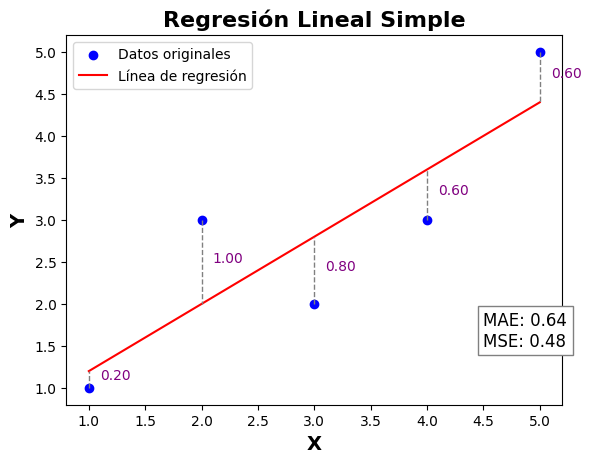

In [58]:
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # reshape convierte el array en columna
y = np.array([1, 3, 2, 3, 5])

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Realizar predicciones (en este caso predice para los mismos puntos)
y_pred = modelo.predict(X)

# Mostrar los resultados
print("Pendiente o coeficiente (m): {:.2f}".format(modelo.coef_[0]))
print("Intersección con el eje Y (b): {:.2f}".format(modelo.intercept_))

# Calcular métricas
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Graficar los puntos originales
plt.scatter(X, y, color='blue', label='Datos originales')

# Graficar la línea de regresión
plt.plot(X, y_pred, color='red', label='Línea de regresión')

# Dibujar líneas de error
for xi, yi, ypi in zip(X.flatten(), y, y_pred):
    plt.plot([xi, xi], [yi, ypi], color='gray', linestyle='--', linewidth=1)
    # Etiqueta para el error
    error = abs(yi - ypi)
    plt.text(xi + 0.1, (yi + ypi) / 2, f"{error:.2f}", fontsize=10, color='purple')

# Agregar métricas al gráfico
plt.text(max(X) - 0.5, min(y) + 0.5, f"MAE: {mae:.2f}\nMSE: {mse:.2f}", fontsize=12, color='black',
         bbox=dict(facecolor='white', edgecolor='gray'))

# Etiquetas y título del gráfico
plt.xlabel('X', fontsize=14, fontweight="bold")
plt.ylabel('Y', fontsize=14, fontweight="bold")
plt.title('Regresión Lineal Simple', fontsize=16, fontweight="bold")
plt.legend()

# Mostrar gráfico
plt.show()


## Entendiendo el concepto de error

In [15]:
# Cálculo del error (valor real - valor predicho)
error = y - y_pred

# Crear un DataFrame para mostrar los resultados
tabla = pd.DataFrame({
    'X': np.array([1, 2, 3, 4, 5]),
    'Y (Real)': y,
    'Y (Predicho)': y_pred,
    'Error': error
})

# Mostrar la tabla
print(tabla)

   X  Y (Real)  Y (Predicho)  Error
0  1         1           1.2   -0.2
1  2         3           2.0    1.0
2  3         2           2.8   -0.8
3  4         3           3.6   -0.6
4  5         5           4.4    0.6


In [59]:
# Cálculo manual del MSE
mse_manual = np.mean((y - y_pred) ** 2)

# Cálculo del MSE usando scikit-learn
mse_sklearn = mean_squared_error(y, y_pred)

# Mostrar ambos resultados
print(f"MSE calculado manualmente: {mse_manual : .2f}")
print(f"MSE calculado con scikit-learn: {mse_sklearn : .2f}")

MSE calculado manualmente:  0.48
MSE calculado con scikit-learn:  0.48


In [44]:
# Funcinones para ayudar con la interpretación de las métricas
def interpretacion(algoritmo : str, score : float, contexto : str, caracteristicas : np.array = None):
  if not caracteristicas == None:
    return f"""Modelo de regresión {algoritmo}
    {score :.2%} de la variabilidad en {contexto} se puede explicar utilizando: {caracteristicas.values}."""
  else:
    return f"""Modelo de regresión {algoritmo}
      {score :.2%} de la variabilidad en {contexto} se puede explicar utilizando las variables dependientes"""

def mae_interpretacion(modelo : str, value : float, contexto : str):
  print(f"El modelo '{modelo}' pudo predecir {contexto} en el conjunto de prueba con un error de ± $ {value:.2f} del valor real.")

def msle_interpretacion(modelo : str, value : float, contexto : str):
  print(f"El modelo '{modelo}' pudo predecir {contexto} en el conjunto de prueba con un error de ± {value: .2%} del valor real.")

In [22]:
score_modelo = modelo.score(X, y)
print(score_modelo)

0.7272727272727273


In [25]:
print(interpretacion("Regresión lineal", score_modelo, "y"))

Modelo de regresión Regresión lineal
      72.73% de la variabilidad en y se puede explicar utilizando las variables independientes


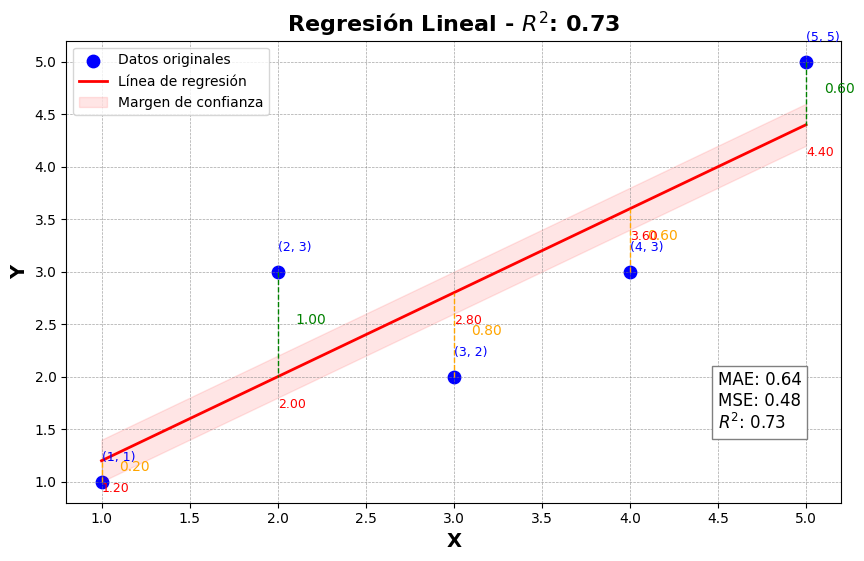

In [62]:
# Gráfico
plt.figure(figsize=(10, 6))

# Puntos originales
plt.scatter(X, y, color='blue', s=80, label='Datos originales')

# Línea de regresión con sombra
plt.plot(X, y_pred, color='red', label='Línea de regresión', linewidth=2)
plt.fill_between(X.flatten(), y_pred - 0.2, y_pred + 0.2, color='red', alpha=0.1, label='Margen de confianza')

# Líneas de error
for xi, yi, ypi in zip(X.flatten(), y, y_pred):
    color = 'green' if yi > ypi else 'orange'  # Diferenciar errores positivos y negativos
    plt.plot([xi, xi], [yi, ypi], color=color, linestyle='--', linewidth=1)
    plt.text(xi + 0.1, (yi + ypi) / 2, f"{abs(yi - ypi):.2f}", fontsize=10, color=color)

# Anotaciones
for xi, yi, ypi in zip(X.flatten(), y, y_pred):
    plt.text(xi, yi + 0.2, f"({xi}, {yi})", fontsize=9, color='blue')
    plt.text(xi, ypi - 0.3, f"{ypi:.2f}", fontsize=9, color='red')

# Métricas en el gráfico
plt.text(max(X) - 0.5, min(y) + 0.5, f"MAE: {mae:.2f}\nMSE: {mse:.2f}\n$R^2$: {score_modelo:.2f}",
         fontsize=12, color='black', bbox=dict(facecolor='white', edgecolor='gray'))

# Estilo del gráfico
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('X', fontsize=14, fontweight="bold")
plt.ylabel('Y', fontsize=14, fontweight="bold")
plt.title(f'Regresión Lineal - $R^2$: {score_modelo:.2f}', fontsize=16, fontweight="bold")
plt.legend()

# Mostrar gráfico
plt.show()

# Ejemplo con más datos (acercándonos a la realidad)

In [34]:
# Fijar semilla para poder reproducir resultados
np.random.seed(29)

In [35]:
# Crear un rango de valores continuos para la edad
n = 500
edad = np.random.randint(20, 61, size=n)

# Generar sueldos como una función cuadrática de la edad con ruido
sueldo = 2000 + 50 * edad - 0.5 * (edad - 40)**2 + np.random.normal(0, 500, size=n)


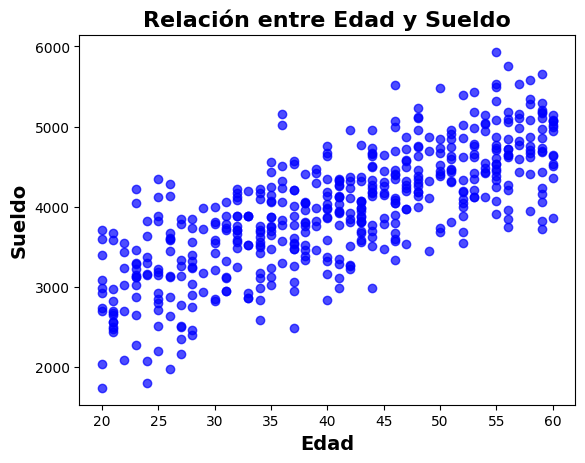

In [36]:
# Crear un DataFrame para los datos
data = pd.DataFrame({'Edad': edad, 'Sueldo': sueldo})

# Visualizar los datos
plt.scatter(data['Edad'], data['Sueldo'], alpha=0.7, color='blue')
plt.title('Relación entre Edad y Sueldo', fontsize=16, fontweight="bold")
plt.xlabel('Edad', fontsize=14, fontweight="bold")
plt.ylabel('Sueldo', fontsize=14, fontweight="bold")
plt.show()

In [ ]:
# Crear el modelo de regresión lineal
X = data[['Edad']]
y = data['Sueldo']

modelo_x = LinearRegression()
modelo_x.fit(X, y)

# Predicciones
data['Prediccion'] = modelo_x.predict(X)

In [39]:
print("Coeficientes : ", modelo_x.coef_)
print("bias = ", modelo_x.intercept_)

Coeficientes :  [49.43004024]
bias =  1944.426524726718


In [40]:
# Calcular el MAE y MSE del modelo
mse = mean_squared_error(y, data['Prediccion'])
mae = mean_absolute_error(y, data['Prediccion'])
print(f"MSE Regresión Lineal: {mse:.2f}")
print(f"MAE Regresión Lineal: {mae:.2f}")

MSE Regresión Lineal: 238269.14
MAE Regresión Lineal: 384.49


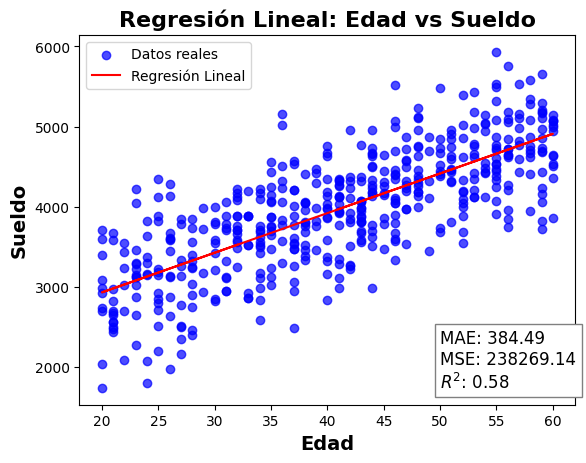

In [56]:
# Agregar métricas al gráfico
plt.text(np.max(X) - 10, min(y) + 0.5,
         f"MAE: {mae:.2f}\nMSE: {mse:.2f}\n$R^2$: {modelo_x.score(X,y):.2f}",
         fontsize=12, color='black',
         bbox=dict(facecolor='white', edgecolor='gray'))

# Visualizar los resultados
plt.scatter(data['Edad'], data['Sueldo'], alpha=0.7, color='blue', label='Datos reales')
plt.plot(data['Edad'], data['Prediccion'], color='red', label='Regresión Lineal')
plt.title('Regresión Lineal: Edad vs Sueldo', fontsize=16, fontweight="bold")
plt.xlabel('Edad', fontsize=14, fontweight="bold")
plt.ylabel('Sueldo', fontsize=14, fontweight="bold")
plt.legend()
plt.show()

In [57]:
print(interpretacion("Regresión lineal", modelo_x.score(X,y), "sueldo", X.columns))

Modelo de regresión Regresión lineal
    57.53% de la variabilidad en sueldo se puede explicar utilizando: ['Edad'].
